In [10]:
import os 
import random 
import numpy as np
from tqdm import tqdm
from skimage.io import imread, imshow, imsave
from skimage.transform import resize 
import matplotlib.pyplot as plt
import pydicom

In [17]:
IMG_WIDTH = 512 
IMG_HEIGHT = 512
IMG_CHANNELS = 1

BASE_PATH = '/home/spidey/Git/cinvestav-tesis/code/unet'

TRAIN_DIC_PATH = BASE_PATH + '/dataset/v2-train/dicom' 
TRAIN_MASK_PATH = BASE_PATH + '/dataset/v2-train/mask' 
TEST_DIC_PATH = BASE_PATH + '/dataset/v2-test/dicom' 

seed = 30
np.random.seed = seed 
np.random.seed = seed

In [18]:

# Get train and test IDs
train_ids = next(os.walk(TRAIN_DIC_PATH))[2]
test_ids = next(os.walk(TEST_DIC_PATH))[2]


#Create array with zeros of the same size as the resize image size.
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint16) 
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint16)


In [ ]:
if 0 :
    mask = imread( '/home/spidey/Git/cinvestav-tesis/code/Unet/train/mask/image002-mask.jpg.png'  )[:,:,1]
    mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  preserve_range=True), axis=-1)
    mask[mask < 40] = 0
    Y_train[0] = mask
    imshow(np.squeeze(Y_train[0]))

In [19]:

print('\nResizing training DICOM images ... ')
for index, file in tqdm(enumerate(sorted(os.listdir(TRAIN_DIC_PATH)))) :      
    #print(os.path.join(TRAIN_DIC_PATH,file))    
    img = pydicom.dcmread( os.path.join(TRAIN_DIC_PATH,file) ).pixel_array
    img = np.expand_dims(resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  preserve_range=True), axis=-1)    
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[index] = img #Fill empty X_train with values from img
    

print('\nResizing training masks ... ')    
for index, file in tqdm(enumerate(sorted(os.listdir(TRAIN_MASK_PATH)))) :      
    #print(os.path.join(TRAIN_DIC_PATH,file))    
    mask = imread(  os.path.join(TRAIN_MASK_PATH,file)  )[:,:,1]
    mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  preserve_range=True), axis=-1)
    mask[mask < 40] = 0
    Y_train[index] = mask
    

print('\nResizing test images ... ')
for index, file in tqdm(enumerate(sorted(os.listdir(TEST_DIC_PATH)))) :     
    img = pydicom.dcmread( os.path.join(TEST_DIC_PATH,file) ).pixel_array
    img = np.expand_dims(resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  preserve_range=True), axis=-1)    
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[index] = img #Fill empty X_train with values from img
    
print('\nDone !!!')
    

3it [00:00, 27.53it/s]


Resizing training DICOM images ... 


86it [00:02, 35.19it/s]
11it [00:00, 102.27it/s]


Resizing training masks ... 


86it [00:00, 104.69it/s]
4it [00:00, 36.56it/s]


Resizing test images ... 


18it [00:00, 35.84it/s]


Done !!!


Dicom


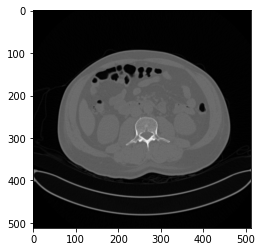

mask


In [33]:
# plot the image using matplotlib
index = random.randint(0, len(X_train)-1)

print('Dicom')
plt.imshow(np.squeeze(X_train[index]),  cmap=plt.cm.gray)
plt.show()

print('mask')
plt.imshow(np.squeeze(Y_train[index]))
plt.show()


In [30]:
#save np arrays to file
np.save(BASE_PATH + '/dataset/x_train', X_train)
np.save(BASE_PATH + '/dataset/y_train', Y_train)
np.save(BASE_PATH + '/dataset/x_test', X_test)
